In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from analysis.utils import get_env
from api.portfolio.returns import get_portfolio_returns

UNRAVEL_API_KEY = get_env("UNRAVEL_API_KEY")

portfolios = [
    "momentum_enhanced.40",
    "carry_enhanced.40",
    "retail_flow.40",
    "altair.40",
    "open_interest_divergence.40",
    "relative_illiquidity.40",
]

returns_df = pd.DataFrame(
    {
        portfolio: get_portfolio_returns(portfolio, UNRAVEL_API_KEY)
        for portfolio in portfolios
    }
)

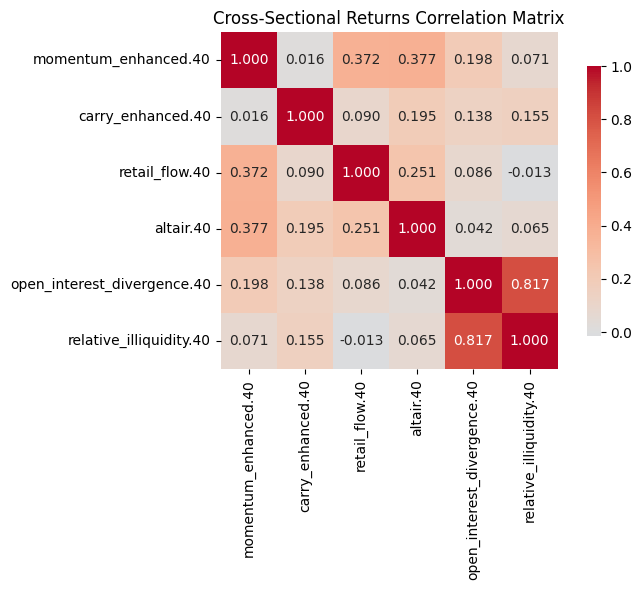

In [2]:

correlation_matrix = returns_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    center=0,
    square=True,
    fmt=".3f",
    cbar_kws={"shrink": 0.8},
)
plt.title("Cross-Sectional Returns Correlation Matrix")
plt.tight_layout()
plt.show()

In [3]:

print("Correlation Statistics:")
print(f"Correlation: {correlation_matrix.iloc[0, 1]:.4f}")
print(
    f"Mean return momentum_enhanced.40: {returns_df['momentum_enhanced.40'].mean():.4f}"
)
print(f"Mean return carry_enhanced.40: {returns_df['carry_enhanced.40'].mean():.4f}")
print(
    f"Volatility momentum_enhanced.40: {returns_df['momentum_enhanced.40'].std():.4f}"
)
print(f"Volatility carry_enhanced.40: {returns_df['carry_enhanced.40'].std():.4f}")

Correlation Statistics:
Correlation: 0.0157
Mean return momentum_enhanced.40: 0.0015
Mean return carry_enhanced.40: 0.0010
Volatility momentum_enhanced.40: 0.0173
Volatility carry_enhanced.40: 0.0130
